Mapping from Dan's labels to ours

Simulation = in silico
Other = others (but maybe one is a superset of the other given the additional categories, especially experimental (in vivo/vitro))
Meta analysis = meta_study + RCT_review
Randomized … = RCT
Non-randomized trial = controlled_trial_non_randomised
Prospective cohort + Retrospective cohort + Time-series analysis + Case-control + Cross-sectional + Case Study = comparative_study + descriptive_study = observational study
No map = in_vitro
No map = in_vivo

['Other',
 'Meta analysis',
 'Randomized control trial',
 'Non-randomized trial',
 'Prospective cohort',
 'Time-series analysis',
 'Retrospective cohort',
 'Cross-sectional',
 'Case control',
 'Case study',
 'Simulation']

In [43]:
from common.logging import create_logger
from pathlib import Path
import numpy as np
import pandas as pd
from datasets import single_label_multiclass_annotated_study_design, enrich_annotations, annotations_with_specter_embeddings, coronawhy_annotated_study_design
from classifier import train_validate_catboost_model
from datetime import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
data_dir = Path('/media/wwymak/Storage/coronawhy/nlp_datasets')
annotations_filepath =Path(data_dir/'Study_Design_Annotation_Snapshot_4_12_20.csv')
metadata_filepath   = data_dir/'metadata.csv.zip'

annotations_coronawhy = coronawhy_annotated_study_design(annotations_filepath, metadata_filepath)
annotations_coronawhy.head()

,cord_uid,title,abstract,label,label_string
0,480bzpi1,Do we have enough evidence how seasonal influe...,Abstract Purpose To identify if there is enoug...,8,meta_study
1,y8z0pwgn,A permanent host shift of rabies virus from Ch...,Bat virus host shifts can result in the spread...,0,in_silico
2,cxwucrgo,Structural maturation of rubella virus in the ...,Abstract Rubella virus is a small enveloped vi...,1,in_vitro
3,u4mvk89w,X-Ray Structure and Inhibition of 3C-like Prot...,Porcine epidemic diarrhea virus (PEDV) is a co...,1,in_vitro
4,ff9vfrvc,Impact of SARS on healthcare utilization by di...,Abstract Objective To assess the impact of the...,7,descriptive_study


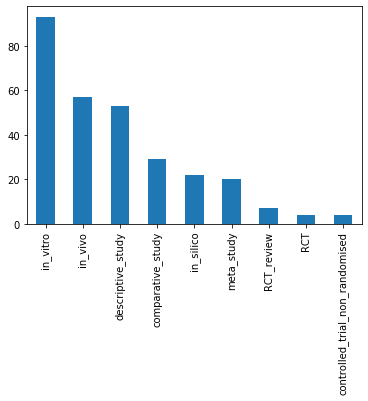

In [46]:
annotations_coronawhy.label_string.value_counts().plot.bar()